In [1]:
# H1N1 Flu Vaccine Analysis

# Introduction
# Big data is characterized by volume, velocity, variety, and veracity. In epidemiology, it helps predict health outcomes.
# Climate change research uses big data to analyze and predict future conditions.
# This study analyzes H1N1 flue vaccine data to understand vaccination behavior.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Load the dataset
file_path = 'H1N1_Flu_Vaccines.csv'
data = pd.read_csv(file_path)


In [3]:
# Data Pre-processing
print('Data Shape:', data.shape)
print('Missing Values:', data.isnull().sum())

Data Shape: (26707, 38)
Missing Values: respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                

In [4]:
# Handling Missing Values
imputer = SimpleImputer(strategy='most_frequent')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)



In [5]:
# Removing Duplicates
data_imputed = data_imputed.drop_duplicates()



In [6]:
# Outlier Detection
def detect_outliers(df):
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        plt.figure(figsize=(6, 4))
        sns.boxplot(df[col])
        plt.title(f'Outliers in {col}')
        plt.show()

detect_outliers(data_imputed)

In [7]:
# Data Wrangling
label_enc = LabelEncoder()
for col in data_imputed.select_dtypes(include=['object']).columns:
    data_imputed[col] = label_enc.fit_transform(data_imputed[col].astype(str))


In [9]:
# Normalization
from sklearn.preprocessing import StandardScaler

# Select only numeric columns
numeric_cols = data_imputed.select_dtypes(include=['float64', 'int64']).columns

# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_imputed[numeric_cols])

# Convert back to DataFrame with original column names
scaled_df = pd.DataFrame(scaled_features, columns=numeric_cols)

# Update the original DataFrame with scaled values
data_imputed[numeric_cols] = scaled_df

In [10]:
# Descriptive Analytics
print('Basic Statistics:')
print(data_imputed.describe())


Basic Statistics:
       respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
count   2.670700e+04  2.670700e+04    2.670700e+04               2.670700e+04   
mean   -3.405454e-17  2.979773e-17    1.308972e-16              -4.363238e-17   
std     1.000019e+00  1.000019e+00    1.000019e+00               1.000019e+00   
min    -1.731986e+00 -1.781960e+00   -2.044279e+00              -2.262927e-01   
25%    -8.659930e-01 -6.818488e-01   -4.236260e-01              -2.262927e-01   
50%     0.000000e+00  4.182621e-01   -4.236260e-01              -2.262927e-01   
75%     8.659930e-01  4.182621e-01    1.197027e+00              -2.262927e-01   
max     1.731986e+00  1.518373e+00    1.197027e+00               4.419056e+00   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
count          2.670700e+04          2.670700e+04           2.670700e+04   
mean          -1.058883e-16          6.385227e-18           1.505849e-16   
std            1.000019e

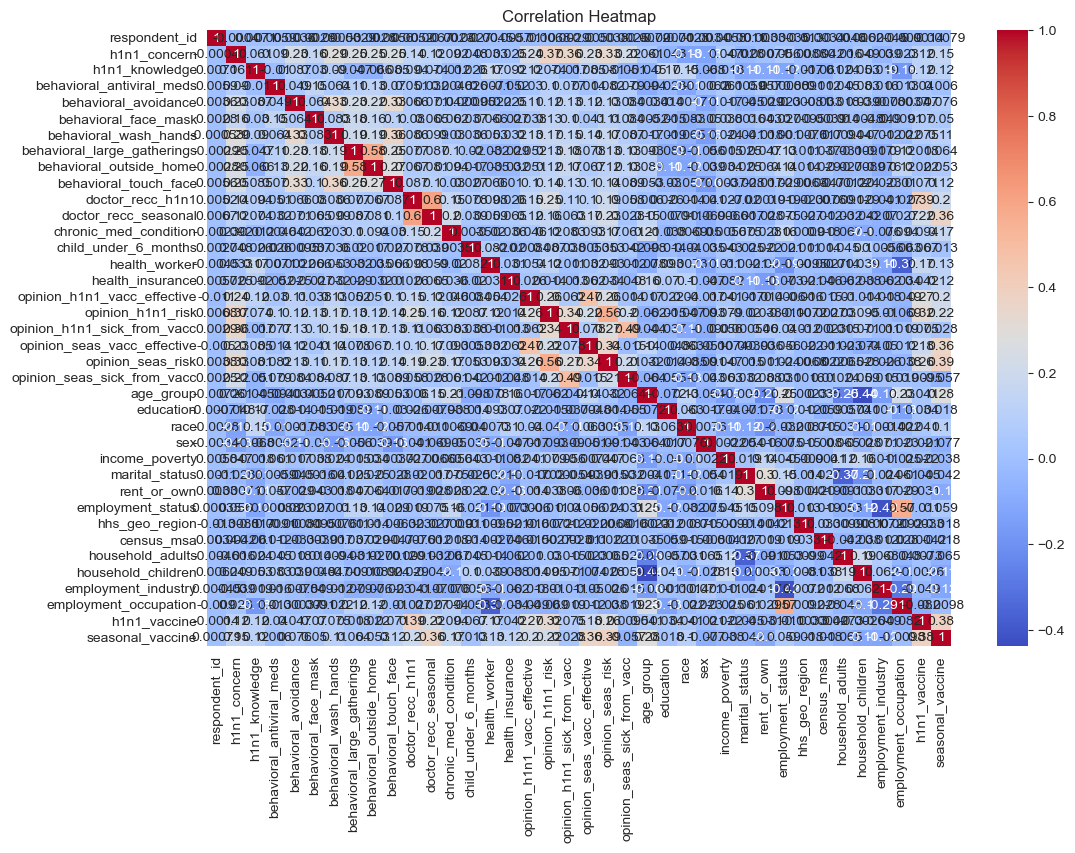

In [11]:
# Correlation Analysis
plt.figure(figsize=(12, 8))
sns.heatmap(data_imputed.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [14]:
# Predictive Analytics - Prepare data
X = data_imputed.drop(['h1n1_vaccine', 'seasonal_vaccine'], axis=1)
y = data_imputed['h1n1_vaccine']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(y_train.unique())
print(y_train.dtype)

[-0.51939056  1.9253334 ]
float64


In [19]:
from sklearn.preprocessing import StandardScaler

X = data_imputed.drop('h1n1_vaccine', axis=1)
y = data_imputed['h1n1_vaccine']  # binary labels

# Scale only X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
print("y head:", y.head())
print("y unique values:", y.unique())
print("y dtype:", y.dtype)


y head: 0   -0.519391
1   -0.519391
2   -0.519391
3   -0.519391
4   -0.519391
Name: h1n1_vaccine, dtype: float64
y unique values: [-0.51939056  1.9253334 ]
y dtype: float64


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)


print('Logistic Regression Accuracy:', accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [22]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))



ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [20]:
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
print('Gradient Boosting Accuracy:', accuracy_score(y_test, gb_predictions))
print(classification_report(y_test, gb_predictions))


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [21]:
# K-Means Clustering (unsupervised)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
cluster_labels = kmeans.labels_
print('K-Means Cluster Distribution:', np.bincount(cluster_labels))


K-Means Cluster Distribution: [12750 13957]
